<a href="https://colab.research.google.com/github/NadavMenirav/ML-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

עבודה 30 אחוז נדב מנירב

העבודה שעשיתי יכולה להבדיל ולהפריד בין תמונות של אריה לבין תמונות של אריה ים, באמצעות אלגוריתמים של קייאנאן ופרספטרון.
בחרתי את הנושא הזה מכיוון שאני מאוד אוהב חיות, ורציתי לראות את ההבדל המובהק בין הכחולים של הים בתמונות של אריה הים לבין הכתומים של הספארי בתמונות של האריה. בנוסף אחת מהתמונות של האריות זו תמונה שצילמתי בעצמי כשהייתי בטנזניה



אימפורטים מפייתון


In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Start of KNN

הפעולה מקבלת תמונה ומחזירה ממוצע צבעים שלה.
היא מחשבת את המימדים של התמונה ועוברת על כל הפיקסלים שלה ומוסיפה לקאונטרים את כמות האדום, הירוק והכחול שיש בכל פיקסל. לבסוף היא מחלקת את כמות הצבעים הללו שהתקבלו מכל הפיקסלים ומחלקת במספר הפיקסלים כדי לקבל את ממוצע האדום, הירוק והכחול בתמונה


In [ ]:
#מקבלת תמונות ומחזירה ממוצע של הצבעים: אדום ירוק וכחול

def image_to_features(image):

  red_counter = 0 #כמה אדום
  green_counter = 0#כמה ירוק
  blue_counter = 0 #כמה כחול
  counter = 0 #כמות הפיקסלים בתמונה

  (height,width,color) = image.shape #המימדים של התמונה

  #עובר פיקסל-פיקסל בתמונה
  for h in range(height):
    for w in range(width):
      counter=counter+1
      #הוספת כמות הצבעים בתמונה
      red_counter += image[h,w,0]
      green_counter += image[h,w,1]
      blue_counter += image[h,w,2]

  average_red = red_counter/counter #ממוצע האדום בתמונה
  average_green = green_counter/counter #ממוצע הירוק בתמונה
  average_blue = blue_counter/counter #ממוצע הכחול בתמונה

  features = [average_red,average_green,average_blue] #מערך עם הצבעים של התמונה
  return features

מימוש הפעולה שכתבנו להשגת ממוצע הצבעים של כל התמונות: אריה, אריה ים וטסט

In [ ]:
featuresT=np.zeros((38,3)) #יצירת מטריצה של 38 שורות (כמספר התמונות) ושלושה טורים כמספר הצבעים

colors=[] #הצבעים של הנקודות על הגרף
labelT=[] #השם של התמונה: אריה, אריה ים או טסט

for i in range(38):
  if i<15:# אריה
    image=mpimg.imread("/content/drive/MyDrive/DATA/Project/lion"+str(i+1)+".jpg") #lion 1-15
    featuresT[i]=image_to_features(image)
    labelT.append("lion")
    colors.append("green")

  elif i>=15 and i<30 :# אריה ים
    image=mpimg.imread("/content/drive/MyDrive/DATA/Project/sea"+str(i-14)+".jpg") #seaLion 1-15
    featuresT[i]=image_to_features(image)
    labelT.append("seaLion")
    colors.append("red")
  else:
    image=mpimg.imread("/content/drive/MyDrive/DATA/Project/test"+str(i-29)+".jpg")
    featuresT[i]=image_to_features(image)
    labelT.append("test")
    colors.append("blue")

In [ ]:
# הצגת הנתונים
print(featuresT)
print(colors)
print(labelT)

[[156.23236111 135.30377315 102.33229074]
 [187.89737913 155.58165649 132.15738422]
 [153.55202012 141.32498535 117.88159623]
 [134.3581249  109.49451179  82.56056468]
 [124.03236602 107.08626374  83.68194505]
 [153.66307361 126.93119028 107.03920903]
 [179.20113723 152.95057451 109.40335451]
 [166.93256142 165.95117471 133.63290031]
 [126.5508712  120.36936705  94.50454282]
 [116.18265188  85.98138933  47.6897253 ]
 [125.38762997 103.42356129  83.49324393]
 [189.9466095  130.83589554  67.39985466]
 [127.05670181 109.30391605  87.02151144]
 [157.20670599 126.15466829  88.00295669]
 [123.30327441 125.02036308 105.09888167]
 [112.99974521 118.32070631 132.79323842]
 [143.9435     151.69659259 149.48022222]
 [ 37.40733043 115.07575558 149.70312765]
 [105.56417033 116.62903064 106.69165955]
 [ 98.24003095 152.87382124 107.11555657]
 [ 34.10261913 110.48483965 113.2540888 ]
 [109.62655733 111.60333333 118.01564   ]
 [163.26360951 155.79789606 148.27618294]
 [118.158597   134.17429839 130.28

יצירת גרף מהצבעים אדום וירוק.
נקודה אדומה - אריה ים.
נקודה ירוקה - אריה.
נקודה כחולה - טסט

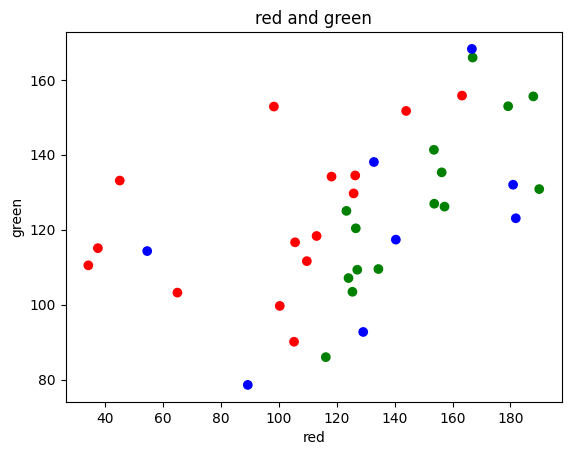

In [ ]:
plt.scatter(x=featuresT[:,0],y=featuresT[:,1],color=colors) #הכנסת הנקודות לגרף
plt.title("red and green") #כותרת
plt.xlabel("red") #כותרת ציר איקס
plt.ylabel("green") #כותרת ציר וואי
plt.show() #הצגת הגרף

יצירת הגרף מהצבעים אדום וכחול, אותו נבחר להכנת להכנת האלגוריתמים מכיוון שבו ההפרדה הטובה ביותר בין הנקודות הירוקות והאדומות

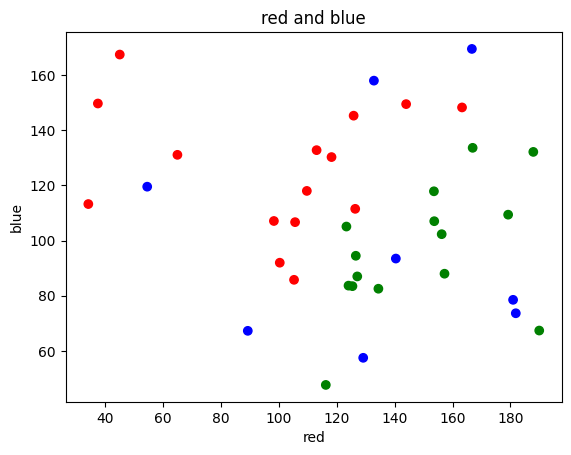

In [ ]:
plt.scatter(x=featuresT[:,0],y=featuresT[:,2],color=colors) #הכנסת הנקודות לגרף
plt.title("red and blue") #כותרת
plt.xlabel("red") #כותרת ציר איקס
plt.ylabel("blue") #כותרת ציר וואי
plt.show() #הצגת הגרף

יצירת גרף מהצבעים ירוק וכחול

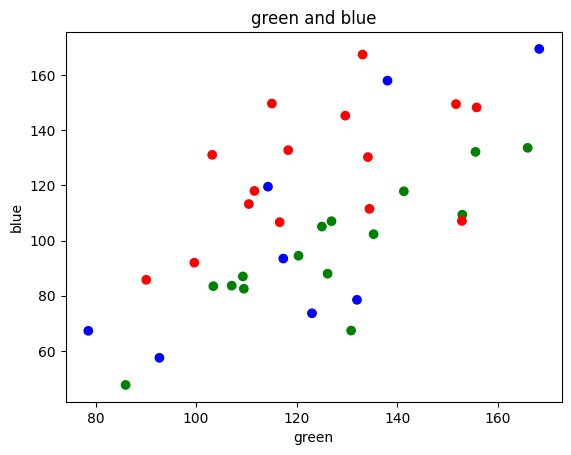

In [ ]:
plt.scatter(x=featuresT[:,1],y=featuresT[:,2],color=colors) #הכנסת הנקודות לגרף
plt.title("green and blue") #כותרת
plt.xlabel("green") #כותרת ציר איקס
plt.ylabel("blue") #כותרת ציר וואי
plt.show() #הצגת הגרף

פעולה שמחשבת את המרחקים בין שתי נקודות, כדי למצוא בשלב יותר מאוחר את ה"שכנים" של כל טסט

הגרף שבחרנו קודם, רלוונטי רק לאלגוריתמים האחרים, עבור הקייאנאן הפעולה הזו פועלת באופן תלת מימדי ועוברת על כל הצבעים של התמונה.

In [ ]:
def distance(p1,p2):
  d=0
  for i in range(len(p1)):
    d+=(p1[i]-p2[i])**2 #לפי נוסחת מרחק בין שתי נקודות במרחב
    d=np.sqrt(d)
  return d

יצירת שלושה מערכים אחד בתוך השני. המערך הגדול "אולדיסטנסס" מכיל בתוכו 8 מערכי "דיסטנסס" כל תא בשביל כל טסט. בתוך כל תא במערך הזה יש את המערך "דיס אנד לאב" שבו יש את המרחק של כל טסט מכל 30 הנקודות, והשם של הנקודה ממנה מודדים את המרחק, אריה או אריה ים.

In [ ]:
allDistances=[] #מערך כולל
for x in range(8): #עבור כל טסט
  distances = []
  for i in range(30): #עבור כל אחת מהתמונות של אריה ואריה ים
    dis=distance(featuresT[x+30],featuresT[i])
    label=labelT[i]
    dis_and_lab=[dis,label]
    distances.append(dis_and_lab)
  allDistances.append(distances)
print(allDistances)

[[[9.82147905183925, 'lion'], [39.160026106780336, 'lion'], [24.877276450158973, 'lion'], [11.305968664937227, 'lion'], [10.361322786588923, 'lion'], [13.916004587291587, 'lion'], [17.004969611343117, 'lion'], [40.7406377014076, 'lion'], [2.4100559368186083, 'lion'], [46.15212033698295, 'lion'], [10.701392671000868, 'lion'], [26.38662007180775, 'lion'], [7.12464021892888, 'lion'], [6.316220992283357, 'lion'], [11.971982629291464, 'lion'], [39.36432778289226, 'seaLion'], [56.29003733622735, 'seaLion'], [56.298978862419766, 'seaLion'], [13.418455568072822, 'seaLion'], [14.88592193198254, 'seaLion'], [20.068485023182326, 'seaLion'], [24.681356932885333, 'seaLion'], [55.132122479718426, 'seaLion'], [37.02149259871208, 'seaLion'], [4.589005089548916, 'seaLion'], [74.07224614076556, 'seaLion'], [18.50258896175504, 'seaLion'], [37.818144927428015, 'seaLion'], [9.342437809510916, 'seaLion'], [51.9181216748742, 'seaLion']], [[28.896031902323127, 'lion'], [58.76902830089609, 'lion'], [44.4297309

מסדרים את המרחקים במערכים "דיסטנסס" מהקטן לגדול. כדי למצוא את המרחקים הכי קטנים בשביל לחזור את סוג הטסט. אריה או אריה ים.

In [ ]:
for i in range(8):
  allDistances[i].sort(key=lambda x:x[0])
print(allDistances)

[[[2.4100559368186083, 'lion'], [4.589005089548916, 'seaLion'], [6.316220992283357, 'lion'], [7.12464021892888, 'lion'], [9.342437809510916, 'seaLion'], [9.82147905183925, 'lion'], [10.361322786588923, 'lion'], [10.701392671000868, 'lion'], [11.305968664937227, 'lion'], [11.971982629291464, 'lion'], [13.418455568072822, 'seaLion'], [13.916004587291587, 'lion'], [14.88592193198254, 'seaLion'], [17.004969611343117, 'lion'], [18.50258896175504, 'seaLion'], [20.068485023182326, 'seaLion'], [24.681356932885333, 'seaLion'], [24.877276450158973, 'lion'], [26.38662007180775, 'lion'], [37.02149259871208, 'seaLion'], [37.818144927428015, 'seaLion'], [39.160026106780336, 'lion'], [39.36432778289226, 'seaLion'], [40.7406377014076, 'lion'], [46.15212033698295, 'lion'], [51.9181216748742, 'seaLion'], [55.132122479718426, 'seaLion'], [56.29003733622735, 'seaLion'], [56.298978862419766, 'seaLion'], [74.07224614076556, 'seaLion']], [[6.8964686456915105, 'lion'], [9.711325756055945, 'lion'], [10.8433973

חיזוי האלגוריתם באמצעות לקיחת שלושת הנקודות בעלי המרחקים הקטנים ביותר מהטסט והסתכלות על הלייבל שלהם.

In [ ]:
neighbors=[]
predictionsListKNN3=[]
predictionsListKNN5=[]
predictionsListKNN7=[]
k=3 #מתחילים מ3 שכנים, עושים גם 5 ו7
for y in range(3):
  print(k,"neighbors")
  for x in range(8): #עבור כל טסט
    for i in range(k):
      neighbors.append(allDistances[x][i][1]) #הוספת הלייבל של השכנים הקרובים
    prediction=max(neighbors,key=neighbors.count) #חיזוי הטסט, לפי הלייבל של רוב השכנים הקרובים.
    print(prediction)

    if k==3:
      predictionsListKNN3.append(prediction)
    elif k==5:
      predictionsListKNN5.append(prediction)
    else:
      predictionsListKNN7.append(prediction)

    neighbors=[]
  k=k+2   #  הגדלת הפרמטר בשביל הרצת האלגוריתם עבור 5 ו7 שכנים
print(predictionsListKNN3)
print(predictionsListKNN5)
print(predictionsListKNN7)

3 neighbors
lion
lion
lion
lion
seaLion
seaLion
lion
seaLion
5 neighbors
lion
lion
lion
lion
seaLion
seaLion
lion
seaLion
7 neighbors
lion
lion
lion
lion
seaLion
seaLion
lion
seaLion
['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'lion', 'seaLion']
['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'lion', 'seaLion']
['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'lion', 'seaLion']


Confusion Matrix for k=3

['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'lion', 'seaLion']
['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'seaLion', 'seaLion']
              precision    recall  f1-score   support

        lion       0.80      1.00      0.89         4
     seaLion       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



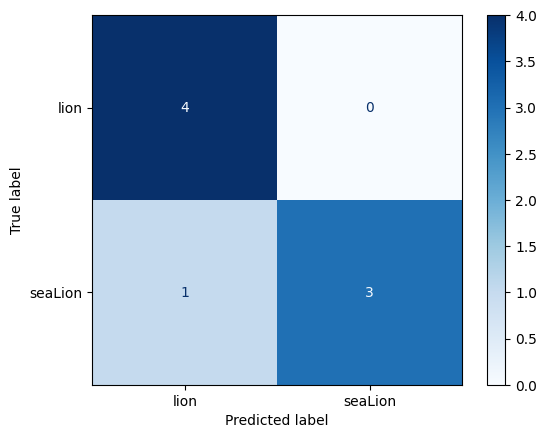

In [ ]:
actual = ['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'seaLion', 'seaLion']
predicted = predictionsListKNN3

print(predicted)
print(actual)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix, display_labels=['lion', 'seaLion'])
cm_display.plot(cmap = 'Blues')
print(classification_report(actual, predicted, target_names=['lion', 'seaLion']))

Confusion matrix k=5

['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'lion', 'seaLion']
['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'seaLion', 'seaLion']
              precision    recall  f1-score   support

        lion       0.80      1.00      0.89         4
     seaLion       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



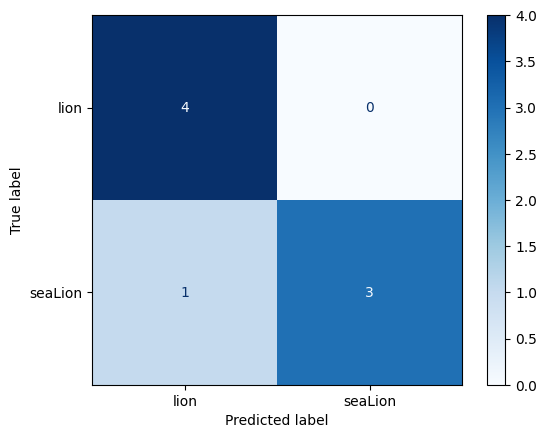

In [ ]:
# actual = ['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'seaLion', 'seaLion']
predicted = predictionsListKNN5

print(predicted)
print(actual)
confusion_matrix_KNN5 = metrics.confusion_matrix(actual, predicted)
cm_display_KNN5 = ConfusionMatrixDisplay(confusion_matrix_KNN5, display_labels=['lion', 'seaLion'])
cm_display_KNN5.plot(cmap = 'Blues')
print(classification_report(actual, predicted, target_names=['lion', 'seaLion']))

confusion matrix k=7

['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'lion', 'seaLion']
['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'seaLion', 'seaLion']
              precision    recall  f1-score   support

        lion       0.80      1.00      0.89         4
     seaLion       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



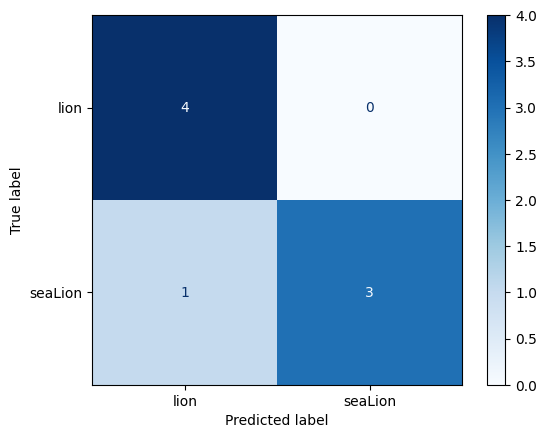

In [ ]:
# actual = ['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'seaLion', 'seaLion']
predicted = predictionsListKNN7

print(predicted)
print(actual)
confusion_matrix_KNN5 = metrics.confusion_matrix(actual, predicted)
cm_display_KNN5 = ConfusionMatrixDisplay(confusion_matrix_KNN5, display_labels=['lion', 'seaLion'])
cm_display_KNN5.plot(cmap = 'Blues')
print(classification_report(actual, predicted, target_names=['lion', 'seaLion']))

# start of Perceptron

הפעולה מקבלת תמונות ומחזירה ממוצע רק של הצבעים אדום וכחול, כי אלה הצבעים שמייצגים את הגרף שבחרנו.

In [ ]:
#מקבלת תמונות ומחזירה ממוצע של הצבעים: אדום וכחול

def image_to_features_red_blue(image):

  red_counter = 0 #כמה אדום
  blue_counter = 0 #כמה כחול
  counter = 0 #כמות הפיקסלים בתמונה

  (height,width,color) = image.shape #המימדים של התמונה

  #עובר פיקסל-פיקסל בתמונה
  for h in range(height):
    for w in range(width):
      counter=counter+1
      #הוספת כמות הצבעים בתמונה
      red_counter += image[h,w,0]
      blue_counter += image[h,w,2]

  average_red = red_counter/counter #ממוצע האדום בתמונה
  average_blue = blue_counter/counter #ממוצע הכחול בתמונה

  features = [average_red,average_blue] #הכנסת הצבעים לרשימה
  return features

הפרדה בין התמונות הרגילות לבין הטסטים לשתי מטריצות שונות, שבשתיהן יהיו רק הצבעים אדום וכחול

In [ ]:
featuresTNoTestsRedBlue=np.zeros((30,2)) #יצירת מטריצה של 30 שורות ושתי עמודות שבכל תא יש מספר 0
testsRedBlue=np.zeros((8,2)) #מטריצה של 8 שורות ושתי עמודות שבכל תא יש 0
colorsNoTests=[] #הצבעים של הנקודות של התמונות ללא הטסטים

for i in range(30):
  colorsNoTests.append(colors[i])

for i in range(38):
  if i<15:# אריה
    image=mpimg.imread("/content/drive/MyDrive/DATA/Project/lion"+str(i+1)+".jpg") #lion 1-15
    featuresTNoTestsRedBlue[i]=image_to_features_red_blue(image)

  elif i>=15 and i<30 :# אריה ים
    image=mpimg.imread("/content/drive/MyDrive/DATA/Project/sea"+str(i-14)+".jpg") #seaLion 1-15
    featuresTNoTestsRedBlue[i]=image_to_features_red_blue(image)
  else: #tests
    image=mpimg.imread("/content/drive/MyDrive/DATA/Project/test"+str(i-29)+".jpg")
    testsRedBlue[i-30]=image_to_features_red_blue(image)
print(featuresTNoTestsRedBlue)
print(testsRedBlue)

[[156.23236111 102.33229074]
 [187.89737913 132.15738422]
 [153.55202012 117.88159623]
 [134.3581249   82.56056468]
 [124.03236602  83.68194505]
 [153.66307361 107.03920903]
 [179.20113723 109.40335451]
 [166.93256142 133.63290031]
 [126.5508712   94.50454282]
 [116.18265188  47.6897253 ]
 [125.38762997  83.49324393]
 [189.9466095   67.39985466]
 [127.05670181  87.02151144]
 [157.20670599  88.00295669]
 [123.30327441 105.09888167]
 [112.99974521 132.79323842]
 [143.9435     149.48022222]
 [ 37.40733043 149.70312765]
 [105.56417033 106.69165955]
 [ 98.24003095 107.11555657]
 [ 34.10261913 113.2540888 ]
 [109.62655733 118.01564   ]
 [163.26360951 148.27618294]
 [118.158597   130.28131361]
 [100.27122114  91.99262625]
 [ 44.96954792 167.44352083]
 [126.34422481 111.51904106]
 [ 64.89414583 131.09461875]
 [105.205116    85.79062066]
 [125.80031479 145.2902426 ]]
[[140.38891151  93.49658207]
 [181.84708808  73.6665776 ]
 [180.9109205   78.53525105]
 [129.10766021  57.51749627]
 [166.6683458

פעולה לחישוב אם נקודה מסוימת היא מתחת או מעל לקו. בשימוש בפעולה שבונה את הקו כדי לתקן אותו בעזרת מקדם הלמידה, ובשימוש לאחר שהקו נבנה לחיזוי הטסטים.

In [ ]:
def perceptron_predict(w,bias,x):
  output=0
  for i in range(len(w)):
    output=output+w[i]*x[i]
  output=output+bias
  if output>0:
    return 1 #מתחת לקו
  else:
    return -1 #מעל הקו

פעולה לחישוב המקדמים האופטימליים של הפרספטרון

In [ ]:
#פעולה שמקבלת רשימת נקודות והסיווג של כל נקודה לאחד או מינוס אחד
#הפעולה מחזירה את המקדמים האופטימליים של הפרספטרון
def perceptron_fit(featuresT,labels):
  n_examples,n_features=featuresT.shape
  w=np.ones((n_features)) #ניחוש ראשוני
  print(w)
  bias=1 #ניחוש ראשוני
  learning_rate=0.1 #קבוע הלמידה
  num_epocs=50

  #run until no errors
  for epoch in range(num_epocs):
    n_errors=0

    #run over all samples
    for i in range(n_examples):
      x=featuresT[i]
      y=labels[i]

      prediction=perceptron_predict(w,bias,x) #הפעלת הפרספטרון

      #if false negative (error on positive example)
      if y==1 and prediction==-1:
        n_errors+=1
        for i in range(len(w)):
          w[i]=w[i]+learning_rate*x[i]
        bias=bias-1

      #if false positive (error in negative examples)
      if y==-1 and prediction==1:
        n_errors+=1
        for i in range(len(w)):
          w[i]=w[i]-learning_rate*x[i]
        bias=bias-1

    print('epoch=',epoch,'n_errors=',n_errors)
    if n_errors==0:
      break
  return[w,bias] #החזרת המקדמים האופטימליים

In [ ]:
labelTNoTestsNum=labelT[0:30] #הלייבלים ללא הטסטים
for i in range(len(labelTNoTestsNum)): # שינוי אריה ל1 ואריה ים למינוס 1 כי הפעולה של חישוב המקדמים של הפרספטרון עובדת עבור 1 ומינוס 1
  if labelTNoTestsNum[i]=="lion":
    labelTNoTestsNum[i]=1
  else:
    labelTNoTestsNum[i]=-1
print(perceptron_fit(featuresTNoTestsRedBlue,labelTNoTestsNum))

[1. 1.]
epoch= 0 n_errors= 1
epoch= 1 n_errors= 2
epoch= 2 n_errors= 2
epoch= 3 n_errors= 2
epoch= 4 n_errors= 2
epoch= 5 n_errors= 2
epoch= 6 n_errors= 2
epoch= 7 n_errors= 2
epoch= 8 n_errors= 2
epoch= 9 n_errors= 3
epoch= 10 n_errors= 2
epoch= 11 n_errors= 2
epoch= 12 n_errors= 3
epoch= 13 n_errors= 2
epoch= 14 n_errors= 3
epoch= 15 n_errors= 2
epoch= 16 n_errors= 4
epoch= 17 n_errors= 2
epoch= 18 n_errors= 2
epoch= 19 n_errors= 2
epoch= 20 n_errors= 2
epoch= 21 n_errors= 2
epoch= 22 n_errors= 4
epoch= 23 n_errors= 2
epoch= 24 n_errors= 2
epoch= 25 n_errors= 2
epoch= 26 n_errors= 2
epoch= 27 n_errors= 2
epoch= 28 n_errors= 2
epoch= 29 n_errors= 2
epoch= 30 n_errors= 2
epoch= 31 n_errors= 2
epoch= 32 n_errors= 2
epoch= 33 n_errors= 2
epoch= 34 n_errors= 2
epoch= 35 n_errors= 2
epoch= 36 n_errors= 2
epoch= 37 n_errors= 2
epoch= 38 n_errors= 3
epoch= 39 n_errors= 2
epoch= 40 n_errors= 2
epoch= 41 n_errors= 2
epoch= 42 n_errors= 2
epoch= 43 n_errors= 2
epoch= 44 n_errors= 2
epoch= 45 n_

ציור הקו של הפרספטרון

[1. 1.]
epoch= 0 n_errors= 1
epoch= 1 n_errors= 2
epoch= 2 n_errors= 2
epoch= 3 n_errors= 2
epoch= 4 n_errors= 2
epoch= 5 n_errors= 2
epoch= 6 n_errors= 2
epoch= 7 n_errors= 2
epoch= 8 n_errors= 2
epoch= 9 n_errors= 3
epoch= 10 n_errors= 2
epoch= 11 n_errors= 2
epoch= 12 n_errors= 3
epoch= 13 n_errors= 2
epoch= 14 n_errors= 3
epoch= 15 n_errors= 2
epoch= 16 n_errors= 4
epoch= 17 n_errors= 2
epoch= 18 n_errors= 2
epoch= 19 n_errors= 2
epoch= 20 n_errors= 2
epoch= 21 n_errors= 2
epoch= 22 n_errors= 4
epoch= 23 n_errors= 2
epoch= 24 n_errors= 2
epoch= 25 n_errors= 2
epoch= 26 n_errors= 2
epoch= 27 n_errors= 2
epoch= 28 n_errors= 2
epoch= 29 n_errors= 2
epoch= 30 n_errors= 2
epoch= 31 n_errors= 2
epoch= 32 n_errors= 2
epoch= 33 n_errors= 2
epoch= 34 n_errors= 2
epoch= 35 n_errors= 2
epoch= 36 n_errors= 2
epoch= 37 n_errors= 2
epoch= 38 n_errors= 3
epoch= 39 n_errors= 2
epoch= 40 n_errors= 2
epoch= 41 n_errors= 2
epoch= 42 n_errors= 2
epoch= 43 n_errors= 2
epoch= 44 n_errors= 2
epoch= 45 n_

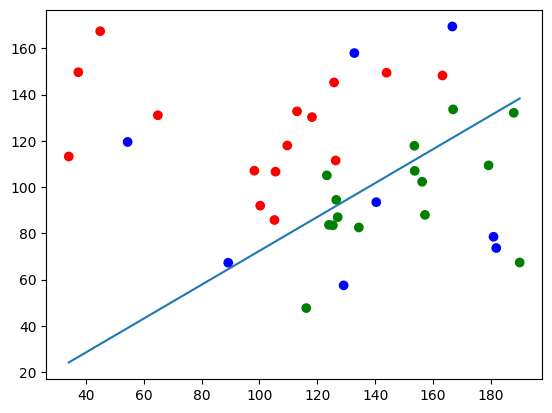

In [ ]:
w, bias = perceptron_fit(featuresTNoTestsRedBlue , labelTNoTestsNum) #קבלת המקדמים האופטימליים
#ציור הקו
x0 = featuresTNoTestsRedBlue[:,0].min()
x1 = featuresTNoTestsRedBlue[:,0].max()
y0 = -(x0*w[0]+bias)/w[1]
y1 = -(x1*w[0]+bias)/w[1]
plt.scatter(x=featuresT[:,0],y=featuresT[:,2],color=colors)
plt.plot([x0,x1], [y0,y1])
plt.show() #הצגת הקו

Prediction based on the perceptron. 1=Lion, -1=Sea Lion

In [ ]:
predictionsListPerceptron=[]
for i in range(8):
  print(perceptron_predict(w,bias,testsRedBlue[i]))
  predictionsListPerceptron.append(perceptron_predict(w,bias,testsRedBlue[i]))

1
1
1
1
-1
-1
-1
-1


confusion matrix perceptron

[1, 1, 1, 1, -1, -1, -1, -1]
[1, 1, 1, 1, -1, -1, -1, -1]
              precision    recall  f1-score   support

        lion       1.00      1.00      1.00         4
     seaLion       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



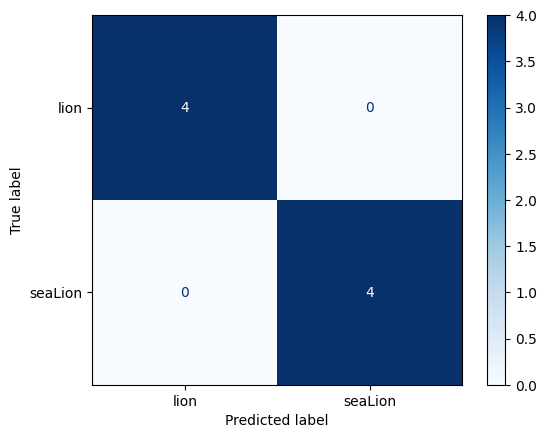

In [ ]:
# actual = ['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'seaLion', 'seaLion']
actual=[1,1,1,1,-1,-1,-1,-1]
predicted = predictionsListPerceptron

print(predicted)
print(actual)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix, display_labels=['lion', 'seaLion'])
cm_display.plot(cmap = 'Blues')
print(classification_report(actual, predicted, target_names=['lion', 'seaLion']))

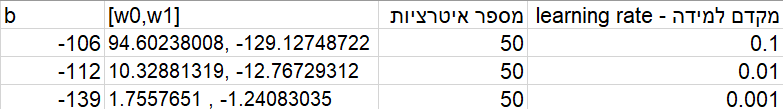

# start of SVM


In [ ]:
for i in range(len(labelTNoTestsNum)): #האלגוריתם מקבל 1 ו 0 ועד עכשיו היה לנו 1 ומינוס 1
  if(i>=15):
    labelTNoTestsNum[i]=0

The use of SVC

ציור הקו המפריד והחיזוי של הטסטים. 1 בשביל אריה, 0 בשביל אריה ים

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


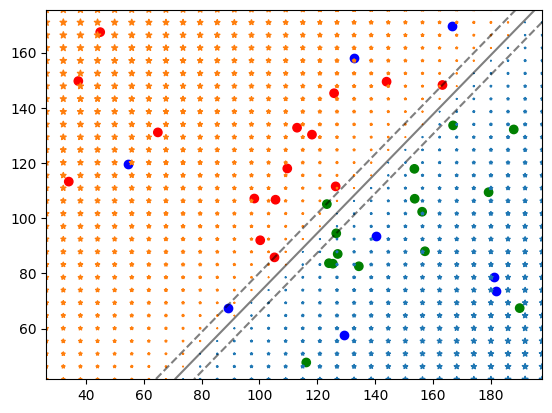

[1 1 1 1 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


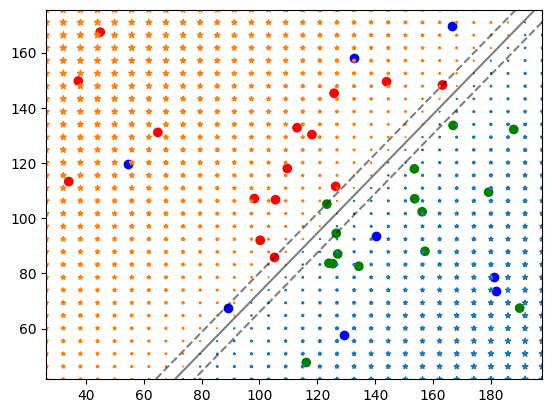

[1 1 1 1 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


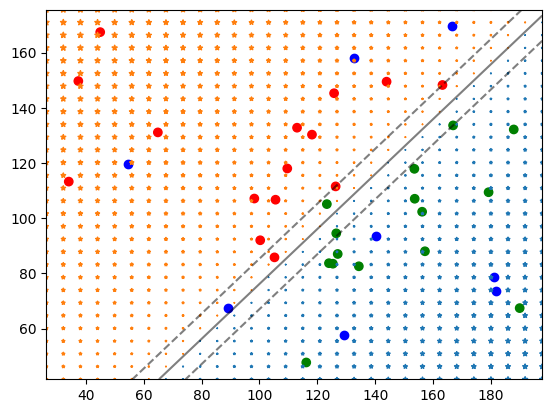

[1 1 1 1 0 0 0 0]


In [ ]:
all_predicts = []
for num in [1.0,0.1,0.01]:
  svm=SVC(kernel='linear', C=num) #יצירת המסווג
  svm.fit(featuresTNoTestsRedBlue,labelTNoTestsNum) #אימון המסווג, תווית 1 בשביל אריה, תווית 0 בשביל אריה ים
  predict=svm.predict(testsRedBlue) #חיזוי המסווג
  distance=svm.decision_function(testsRedBlue) #הפעולה מחזירה מרחק מהקו, חיובי אם היא מעל הקו ושלילי אם מתחתיו


  svm=SVC(kernel='linear', C=num) #יצירת המסווג
  svm.fit(featuresTNoTestsRedBlue,labelTNoTestsNum) #אימון המסווג, תווית 1 בשביל אריה, תווית 0 בשביל אריה ים
  predict=svm.predict(testsRedBlue) #חיזוי המסווג
  distance=svm.decision_function(testsRedBlue) #הפעולה מחזירה מרחק מהקו, חיובי אם היא מעל הקו ושלילי אם מתחתיו
  plt.scatter(featuresTNoTestsRedBlue[:,0], featuresTNoTestsRedBlue[:,1], color=colorsNoTests) #הוספת הנקודות
  plt.scatter(testsRedBlue[:,0],testsRedBlue[:,1],color='blue')
  #get the minimal and maximal X and Y values in the current plot
  ax=plt.gca()
  xlim=ax.get_xlim()
  ylim=ax.get_ylim()
  xx=np.linspace(xlim[0],xlim[1],30)
  yy=np.linspace(ylim[0],ylim[1],30)

  #create grid distance
  XX=np.zeros((30,30))
  YY=np.zeros((30,30))
  Dist=np.zeros((30,30))
  for row in range(30):
    for col in range(30):
      XX[row,col]=xx[col]
      YY[row,col]=yy[row]
      Dist[row,col]=svm.decision_function([(XX[row,col],YY[row,col])])

  plt.scatter(XX,YY,Dist,marker='*')
  plt.scatter(XX,YY,-Dist,marker='*')

  #plot line on change from positive to negative in Dist image
  ax.contour(XX,YY,Dist,colors='k',
            levels=[-1,0,1], alpha=0.5, #draw 3 lines, center and two offsets by +-1
            linestyles=['--','-','--']) #style of the 3 lines
  plt.show()
  print(predict)
  all_predicts.append(predict)





confusion matrix svm

[1 1 1 1 0 0 0 0]
[1, 1, 1, 1, 0, 0, 0, 0]
              precision    recall  f1-score   support

        lion       1.00      1.00      1.00         4
     seaLion       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[1 1 1 1 0 0 0 0]
[1, 1, 1, 1, 0, 0, 0, 0]
              precision    recall  f1-score   support

        lion       1.00      1.00      1.00         4
     seaLion       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

[1 1 1 1 0 0 0 0]
[1, 1, 1, 1, 0, 0, 0, 0]
              precision    recall  f1-score   support

        lion       1.00      1.00      1.00         4
     seaLion       1.00      1.00      1.00         4

    accuracy                           1.00         8

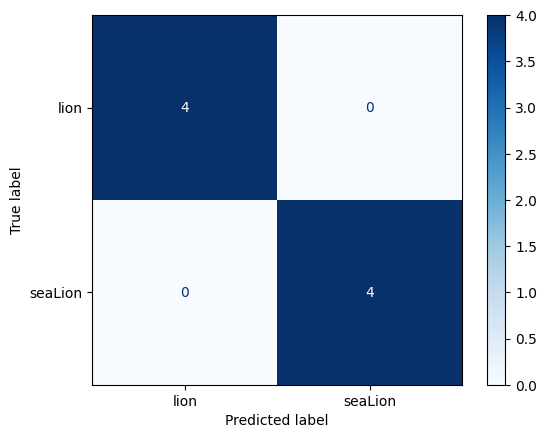

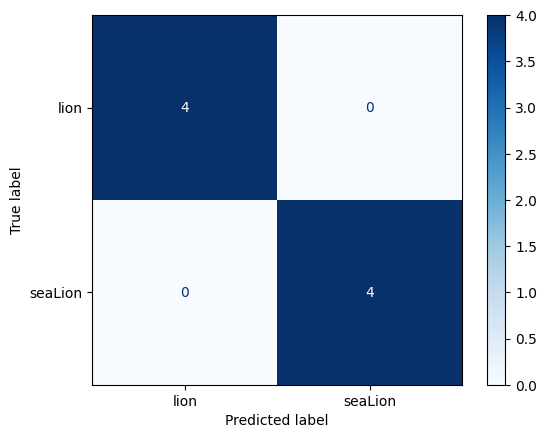

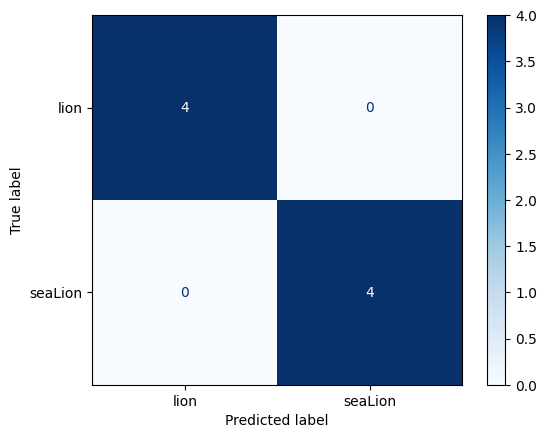

In [ ]:
# actual = ['lion', 'lion', 'lion', 'lion', 'seaLion', 'seaLion', 'seaLion', 'seaLion']
for predict in all_predicts:
  actual=[1,1,1,1,0,0,0,0]
  predicted = predict

  print(predicted)
  print(actual)
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = ConfusionMatrixDisplay(confusion_matrix, display_labels=['lion', 'seaLion'])
  cm_display.plot(cmap = 'Blues')
  print(classification_report(actual, predicted, target_names=['lion', 'seaLion']))

רפלקציה: אני נהניתי מאוד לעשות את העבודה. לפני שהתחלתי אותה הרגשתי שאני לא בקיא בחומר ב100 אחוז, אבל לאחר שביצעתי אותה, נעזרתי באינטרנט, דיברתי עם חברים וחשבנו ביחד על בעיות שהיו לנו בקוד, אני מרגיש עכשיו שאני מבין את החומר הרבה הרבה יותר. לפני העבודה קצת נרתעתי מפייתון ובמיוחד מזה שיש המון פקודות שאני לא מכיר, ועכשיו למדתי להשתמש ולהכיר המון פקודות וקוד חדש שלא הכרתי, ואני הרבה יותר נהנה מלעבוד בשפה


העבודה הייתה חוויה מאוד מאתגרת. בתחילה, למדתי את התאוריות והמושגים הבסיסיים של כל אלגוריתם. ניתן היה למצוא מקורות מידע מגוונים ומדריכים עשירים שהסבירו את הרעיונות והמתמטיקה של כל אחד מהאלגוריתמים הללו.

סיכום: בעבודה הפרדתי בין תמונות של אריה לבין תמונות של אריה ים, תמונות אלו היוו את הדאטה.
השתמשתי בתחילה באלגוריתם קייאנאן שאיתו הצלחתי למצוא את השכנים הקרובים לכל אחת מהתמונות של הטסטים. ובעקבות זה אני עשיתי חיזוי לגבי סוג התמונה.
לאחר מכן המשכתי למסווג של פרספטרון. איתו בניתי קו שיפריד בין קבוצת הנקודות של האריות לבין אלה של אריות הים לפי חיזוי ראשוני. מה שמעל הקו היה אריה ים, ומתחת אליו - אריה. לבסוף השתמשתי במסווג של אסויאם שאיתו בניתי קו בצורה יותר מדוייקת עם שוליים.